In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns', None)
from datetime import datetime as dtt
# Decision Tree Classifier
# Load libraries
from sklearn.tree import DecisionTreeClassifier as dt # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split as tts # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier as rfc

##For Visualization
import seaborn as sn

#For Different configuration
pd.set_option('display.width', 1000)

In [37]:
df=pd.read_csv('uci-electricity-usage.csv')

In [38]:
df.head()

,date,target_appliances,target_lights,target_total,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/1/16 17:00,60,30,90,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11/1/16 17:10,60,30,90,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11/1/16 17:20,50,30,80,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11/1/16 17:30,50,40,90,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11/1/16 17:40,60,40,100,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [39]:
df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)



In [40]:
df.head()


,target_appliances,target_lights,target_total,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-11-01 17:00:00,60,30,90,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-11-01 17:10:00,60,30,90,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-11-01 17:20:00,50,30,80,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-11-01 17:30:00,50,40,90,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
2016-11-01 17:40:00,60,40,100,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [41]:
#df['2016-01-04':'2016-01-10']

## Heating Index Calculation

In [42]:
def calculate_HI(t,r):
    c1=-8.78469475556
    c2 =1.61139411
    c3 =2.33854883889
    c4 =-0.14611605
    c5 =-0.012308094
    c6 =-0.0164248277778
    c7 =0.002211732
    c8 =0.00072546
    c9 =-0.000003582
    R=r
    T=t

    hi=c1+c2*T+c3*R+c4*T*R+c5*T**2+c6*R**2+c7*T**2*R+c8*T*R**2+c9*T**2*R**2
    return hi
    #print("The Heating Index: ",round(hi,2))

In [43]:
df.columns

Index(['target_appliances', 'target_lights', 'target_total', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'], dtype='object')

In [44]:
nameChangedTo=['target_appliances', 'target_lights', 'target_total', 'T_kitchen', 'RH_kitchen', 'T_living', 'RH_living', 'T_laundry', 'RH_laundry', 'T_office', 'RH_office', 'T_bathroom', 'RH_bathroom', 'T_north', 'RH_north', 'T_ironing', 'RH_ironing', 'T_teenRoom', 'RH_teenRoom', 'T_parentsRoom', 'RH_parentsRoom', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'random1', 'random2']

In [45]:
df.columns=nameChangedTo

## Attribute name and Explanations

In [46]:
# 
# Attribute Information:
# date time year-month-day hour:minute:second 
# Appliances, energy use in Wh 
# lights, energy use of light fixtures in the house in Wh 
# T1, Temperature in kitchen area, in Celsius 
# RH_1, Humidity in kitchen area, in % 
# T2, Temperature in living room area, in Celsius 
# RH_2, Humidity in living room area, in % 
# T3, Temperature in laundry room area 
# RH_3, Humidity in laundry room area, in % 
# T4, Temperature in office room, in Celsius 
# RH_4, Humidity in office room, in % 
# T5, Temperature in bathroom, in Celsius 
# RH_5, Humidity in bathroom, in % 
# T6, Temperature outside the building (north side), in Celsius 
# RH_6, Humidity outside the building (north side), in % 
# T7, Temperature in ironing room , in Celsius 
# RH_7, Humidity in ironing room, in % 
# T8, Temperature in teenager room 2, in Celsius 
# RH_8, Humidity in teenager room 2, in % 
# T9, Temperature in parents room, in Celsius 
# RH_9, Humidity in parents room, in % 
# Tout, Temperature outside (from Chievres weather station), in Celsius 
# Pressure (from Chievres weather station), in mm Hg 
# RH_out, Humidity outside (from Chievres weather station), in % 
# Wind speed (from Chievres weather station), in m/s 
# Visibility (from Chievres weather station), in km 
# Tdewpoint (from Chievres weather station), Â°C 
# rv1, Random variable 1, nondimensional 
# rv2, Random variable 2, nondimensional 

In [47]:
df.head()

,target_appliances,target_lights,target_total,T_kitchen,RH_kitchen,T_living,RH_living,T_laundry,RH_laundry,T_office,RH_office,T_bathroom,RH_bathroom,T_north,RH_north,T_ironing,RH_ironing,T_teenRoom,RH_teenRoom,T_parentsRoom,RH_parentsRoom,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,random1,random2
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-11-01 17:00:00,60,30,90,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-11-01 17:10:00,60,30,90,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-11-01 17:20:00,50,30,80,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-11-01 17:30:00,50,40,90,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
2016-11-01 17:40:00,60,40,100,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


<Figure size 1440x1440 with 0 Axes>

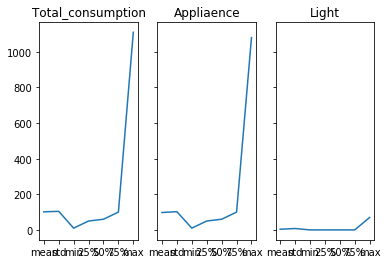

In [70]:
fig=plt.figure(figsize=(20,20))
fig,(ax1,ax2,ax3)=plt.subplots(1,3,sharey='row')
x=df.describe().drop('count',axis=0)
target_APPL=x.target_appliances
target_total=x.target_total
target_light=x.target_lights
ax2.plot(target_APPL)
ax2.set_title('Appliaence')
ax1.plot(target_total)
ax1.set_title('Total_consumption')
ax3.plot(target_light)
ax3.set_title('Light')
# target_APPL.plot.bar()
plt.show();


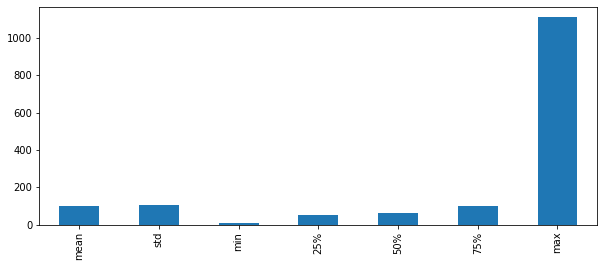

In [14]:
fig=plt.figure(figsize=(10,4))
target_total=x.target_total
target_total.plot.bar()
plt.show()

In [15]:
print("Total Number of Entries: ",df.shape[0])
print('Total number of Features:',df.shape[1])

Total Number of Entries:  19735
Total number of Features: 29


In [16]:
df.describe()

,target_appliances,target_lights,target_total,T_kitchen,RH_kitchen,T_living,RH_living,T_laundry,RH_laundry,T_office,RH_office,T_bathroom,RH_bathroom,T_north,RH_north,T_ironing,RH_ironing,T_teenRoom,RH_teenRoom,T_parentsRoom,RH_parentsRoom,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,random1,random2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,101.496833,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,104.380829,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,1110.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [17]:
x=df.target_lights.value_counts()

In [18]:
df.shape

(19735, 29)

In [19]:
df.target_total.describe()

count    19735.000000
mean       101.496833
std        104.380829
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1110.000000
Name: target_total, dtype: float64

In [20]:
df.loc[df.target_total==1110]

,target_appliances,target_lights,target_total,T_kitchen,RH_kitchen,T_living,RH_living,T_laundry,RH_laundry,T_office,RH_office,T_bathroom,RH_bathroom,T_north,RH_north,T_ironing,RH_ironing,T_teenRoom,RH_teenRoom,T_parentsRoom,RH_parentsRoom,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,random1,random2
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-16 18:50:00,1080,30,1110,21.93,42.766667,21.04,38.08,20.7,40.633333,20.89,39.733333,18.89,51.881667,0.466667,96.09,19.79,37.184286,20.926667,42.663333,17.79,40.6725,2.08,765.033333,85.5,3.666667,40.0,-0.0833,27.408521,27.408521


## Model Evaluation

In [21]:
def model_analysis(model):
        if model=='DT' :
            model='dt'
            train_model('dt')
        elif model=='RF' :
            model='rfc'
            train_model('rfc')

def train_model(model):
        X_train,X_test,y_train,y_test=tts(df_feature,df_target,random_state=45,test_size=0.2)
        if model=='dt':    
            
            clf=dt(criterion="entropy", max_depth=3)
            clf.fit(X_train,y_train)
            y_pred = clf.predict(X_test)
            accuracy=metrics.accuracy_score(y_test, y_pred)*100
            print("Accuracy:",round(accuracy,2))
            CM= confusion_matrix(y_test, y_pred)
            print(CM)
            sn.heatmap(CM)
            plt.show()
        elif model=='rfc':    
            clf=rfc(n_estimators=100)
            clf.fit(X_train,y_train)
            y_pred = clf.predict(X_test)
            accuracy=metrics.accuracy_score(y_test, y_pred)*100
            print("Accuracy:",round(accuracy,2))
            CM= confusion_matrix(y_test, y_pred)
            print(CM)
            sn.heatmap(CM)
            plt.show()

## Generating the Target Classes

In [22]:
def generateClass(x):
    if x<30:
        return 5
    elif (x<=50 and x>=30):
        return 4
    elif (x<=70 and x>50):
        return 3
    elif (x<=90 and x>70):
        return 2
    
    else :
        return 1
    

In [23]:
df.target_total=df.target_total.apply(generateClass) 
df.target_total.head()

datetime
2016-11-01 17:00:00    2
2016-11-01 17:10:00    2
2016-11-01 17:20:00    2
2016-11-01 17:30:00    2
2016-11-01 17:40:00    1
Name: target_total, dtype: int64

In [24]:

df.head()

,target_appliances,target_lights,target_total,T_kitchen,RH_kitchen,T_living,RH_living,T_laundry,RH_laundry,T_office,RH_office,T_bathroom,RH_bathroom,T_north,RH_north,T_ironing,RH_ironing,T_teenRoom,RH_teenRoom,T_parentsRoom,RH_parentsRoom,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,random1,random2
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-11-01 17:00:00,60,30,2,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-11-01 17:10:00,60,30,2,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-11-01 17:20:00,50,30,2,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-11-01 17:30:00,50,40,2,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
2016-11-01 17:40:00,60,40,1,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## Preparing the dataSet





In [71]:
df_feature=df.drop(['target_total'],axis=1)

In [72]:
df_feature.head()

,target_appliances,target_lights,T_kitchen,RH_kitchen,T_living,RH_living,T_laundry,RH_laundry,T_office,RH_office,T_bathroom,RH_bathroom,T_north,RH_north,T_ironing,RH_ironing,T_teenRoom,RH_teenRoom,T_parentsRoom,RH_parentsRoom,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,random1,random2
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-11-01 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-11-01 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-11-01 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-11-01 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
2016-11-01 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [73]:
df_target=df.target_total

In [74]:
df_target.head()

datetime
2016-11-01 17:00:00     90
2016-11-01 17:10:00     90
2016-11-01 17:20:00     80
2016-11-01 17:30:00     90
2016-11-01 17:40:00    100
Name: target_total, dtype: int64

## Result Generation
## For Random Forest :RF
## For Decision Tree :DT

Accuracy: 58.22
[[  0   0   3 ...   0   0   0]
 [  0   0  66 ...   0   0   0]
 [  0   0 140 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


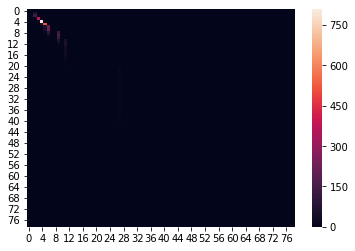

In [75]:
model='DT'
model_analysis(model)

Accuracy: 77.12
[[  0   3   0 ...   0   0   0]
 [  0  56   9 ...   0   0   0]
 [  0   3 133 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


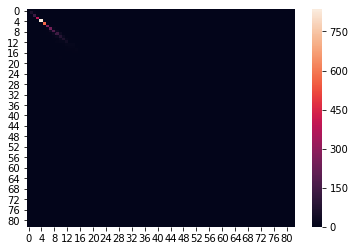

In [76]:
model='RF'
model_analysis(model)

In [92]:
df=pd.read_csv('uci-electricity-usage.csv')
df.head()

,date,target_appliances,target_lights,target_total,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/1/16 17:00,60,30,90,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11/1/16 17:10,60,30,90,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11/1/16 17:20,50,30,80,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11/1/16 17:30,50,40,90,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11/1/16 17:40,60,40,100,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## Some Visualizations

In [94]:
df_dateNappli = pd.DataFrame({'date': df['date'], 'Appliances': df['target_appliances']})
df_dateNappli.date=df_dateNappli.date.astype('datetime64[ns]')
df_dateNappli.set_index('date', inplace=True)

In [ ]:
df_dateNappli['2016-01-12':'2016-01-18'].plot(color="red")
plt.rcParams["figure.figsize"] = (18,10)
plt.title('Appliances energy consumption measurement for a whole week')
plt.grid()
plt.xlabel('Time (1 Week)')
plt.ylabel('Appliances Wh')
plt.show()

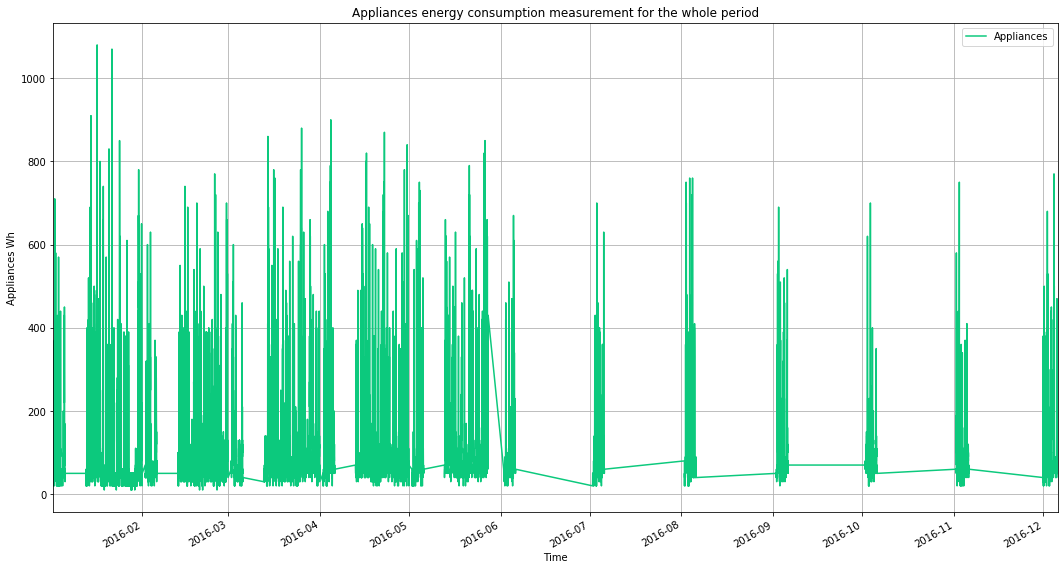

In [96]:
df_dateNappli.plot(color="#0cc97d")
plt.rcParams['figure.figsize']=(18,10)
plt.grid()
plt.title('Appliances energy consumption measurement for the whole period')
plt.xlabel('Time')
plt.ylabel('Appliances Wh')
plt.show()

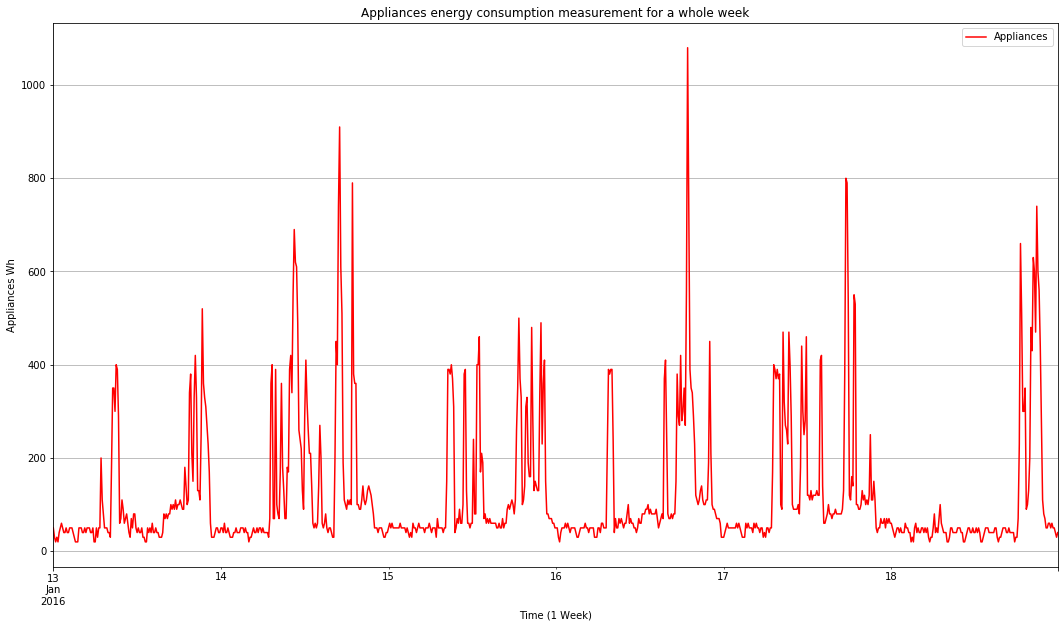

In [97]:
df_dateNappli['2016-01-12':'2016-01-18'].plot(color="red")
plt.rcParams["figure.figsize"] = (18,10)
plt.title('Appliances energy consumption measurement for a whole week')
plt.grid()
plt.xlabel('Time (1 Week)')
plt.ylabel('Appliances Wh')
plt.show()

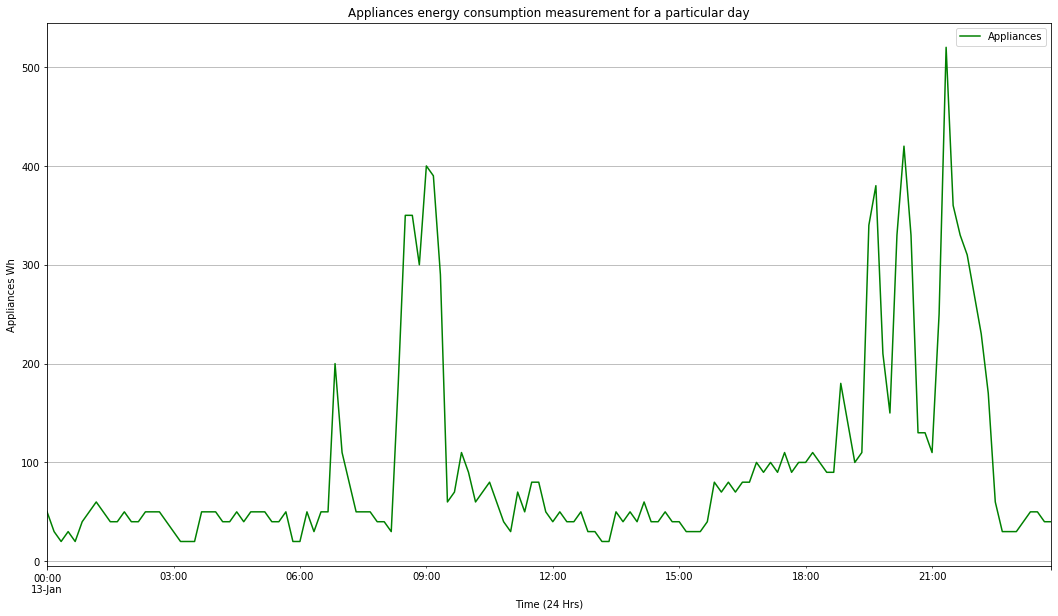

In [101]:
df_dateNappli['2016-01-13':'2016-01-13'].plot(color="green")
plt.rcParams["figure.figsize"] = (18,10)
plt.title('Appliances energy consumption measurement for a particular day')
plt.grid()
plt.xlabel('Time (24 Hrs)')
plt.ylabel('Appliances Wh')
plt.show()

In [103]:
x=df[df['target_appliances']==df.target_appliances.max()]

In [104]:
x

,date,target_appliances,target_lights,target_total,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
731,16/1/16 18:50,1080,30,1110,21.93,42.766667,21.04,38.08,20.7,40.633333,20.89,39.733333,18.89,51.881667,0.466667,96.09,19.79,37.184286,20.926667,42.663333,17.79,40.6725,2.08,765.033333,85.5,3.666667,40.0,-0.0833,27.408521,27.408521


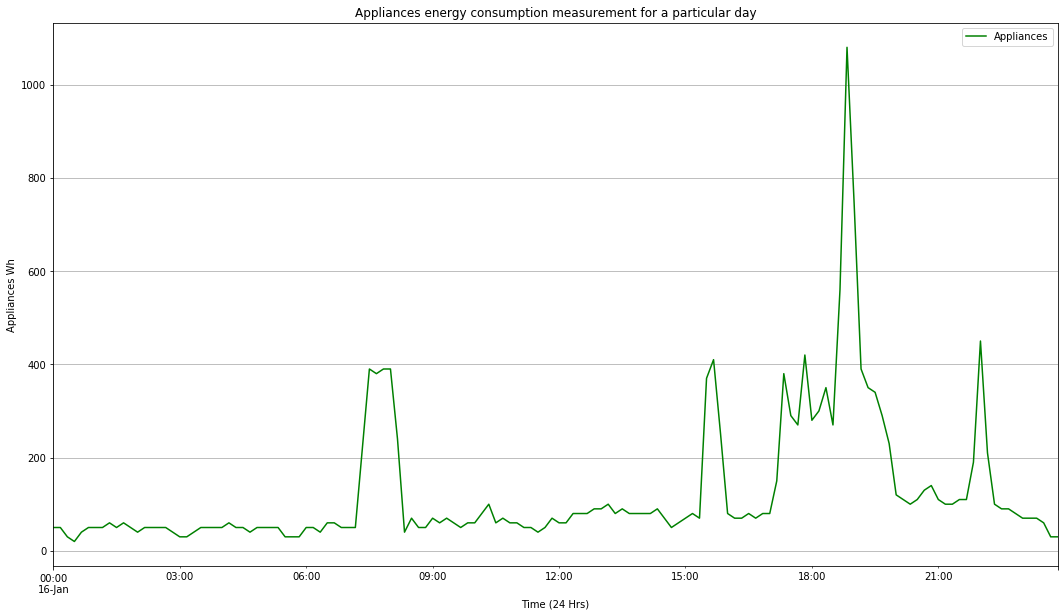

In [105]:
df_dateNappli['2016-01-16':'2016-01-16'].plot(color="green")
plt.rcParams["figure.figsize"] = (18,10)
plt.title('Appliances energy consumption measurement for a particular day')
plt.grid()
plt.xlabel('Time (24 Hrs)')
plt.ylabel('Appliances Wh')
plt.show()

In [106]:
temp=df.T_out[df['target_appliances']==df.target_appliances.max()]

In [114]:
print('At that day the temperature was:',temp.values,'oC')

At that day the temperature was: [2.08] oC
